# Association Rule Mining

Association Rule Mining is used when we want to find an association between various objects in a set, find frequent patterns in a transaction database, relational databases, or any other information repository. It gives us what items do customers frequently buy together by generating a set of rules called Association Rules.

In the field of Test Case Prioritization, items like modified files and tests that failed can be paired with rules. For example, if everytime file A is modified, test 3 is broken, then we have a very strong association rule {A} => 3.


## Looking at the dataset



In [4]:
import pandas as pd
from Data import DataCI

commits = pd.read_csv('../pub_data/test_commits_pub.csv', encoding='latin-1', sep='\t')
test_details = pd.read_csv('../pub_data/test_details_pub.csv', sep='\t')
test_status = pd.read_csv('../pub_data/test_histo_pub.csv', sep='\t')
mod_files = pd.read_csv("../pub_data/test_commits_mod_files_pub.csv", sep='\t')
df = DataCI(commits, test_details, test_status, mod_files).df_link

df.head()

Removing files that are not modified since 2019-03-11 00:00:00.000000
There are 10825 files before cleaning
There are 2274 files after cleaning 

Percentage of files removed 78.99 %

Number of tests - 4219
Number of non-flaky tests - 4219
** Data Cleaning - Removing Stable Tests**
   Number of tests -> 4192
   Threshold -> 10
   Percentage of tests above threshold - 72.95
   Total number of transitions - 100315
   Average number of transitions per test - 23.93010496183206
   Data shape - (3073, 3)

   Number of tests after cleaning-> 3058
   Data shape - (3024, 3) - after cleaning
There are 1686 unique files and 3058
there are 340597 pairs
Most often pairs [((1273, 2155), 57), ((1273, 2288), 57), ((1273, 2552), 43), ((1273, 1805), 41), ((1273, 1804), 41)]
Nr of pairs - 411123
Nr of pairs after threshold 46180


,revision,mod_files,name
0,84614,"[CUDQuidBookend/GaussInvalidEmil.out, Among/UG...",[HADNewBuck_Lucre_Holler.ken]
1,85020,"[CUDJusticiable/CHANGEABLE.out, CUDQuidBookend...",[HADNewBuck_Lucre_Holler.ken]
2,85044,[REGINA/CUDFebNova.out],[HADNewBuck_MENGorgonTall.ken]
3,85045,"[CUDPariahWE/UN_Pediatrician.out, CUDAudioColo...",[HADNewBuck_MENGorgonTall.ken]
4,85051,"[REGINA/CUDFebArabic.pigging, REGINA/CUDFebNov...","[HADNewBuck_FleaRUT.ken, HADNewBuck_SetupPendu..."


## Most Frequent Items

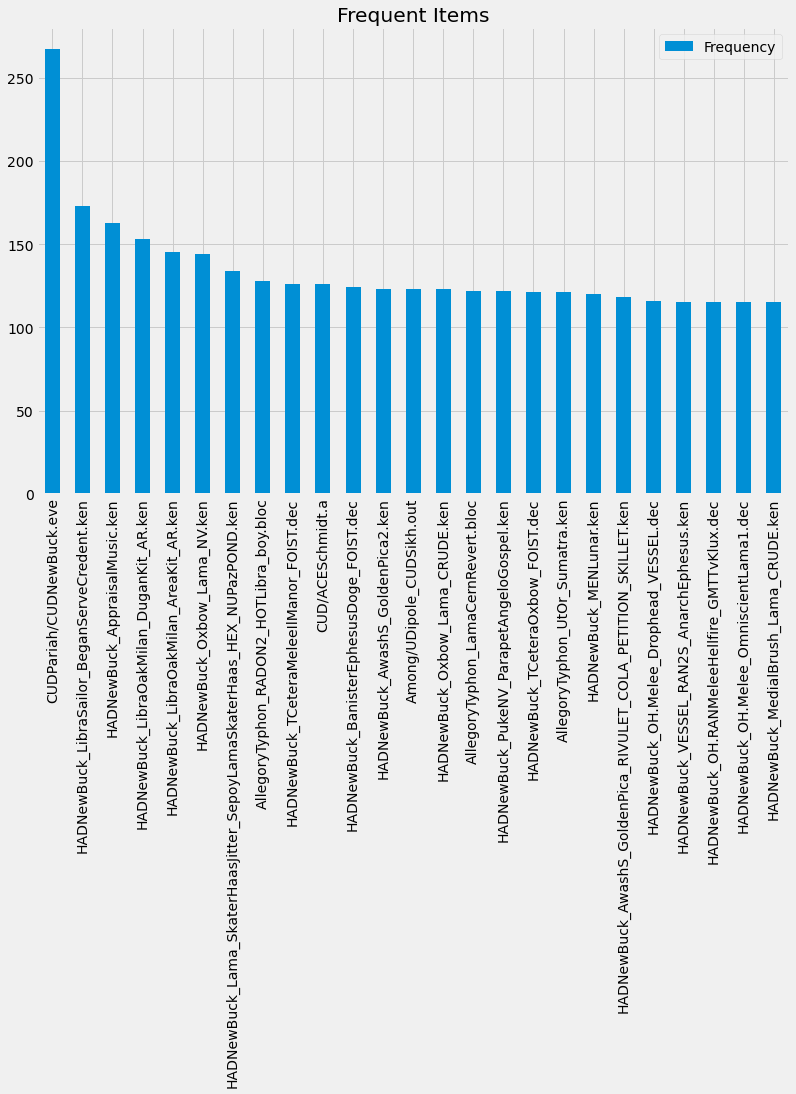

In [11]:
import matplotlib.pylab as plt
df.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',
                                                                                  figsize=(12,8),
                                                                                  title="Frequent Items")
plt.show()

### Label Encoding



In [6]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)
df = df[['mod_files', 'name']]

df = df.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df.pop('mod_files')),
        index=df.index,
        columns=mlb.classes_))

df = df.join(
    pd.DataFrame.sparse.from_spmatrix(
        mlb.fit_transform(df.pop('name')),
        index=df.index,
        columns=mlb.classes_))

In [7]:
df.head()

,ACE_Billow_Bromine/ACEGaussPathology.a,ACE_Billow_Bromine/ACESeparable.a,ACE_Billow_Bromine/ACESuperblyDickens.a,ACE_Billow_Bromine/ACEWileySuperbly.a,ACE_Billow_Bromine/ACEWyOath.a,ACEvzone/ACENewBuck_Hall(Stud=ACEvzone)_Hall(P=YAH)_AX_Calm_owe.rue,ALDERDipole/ALDERDipole.pigging,ALDERDipoleIll/ALDERDipoleIll.pigging,AMPERE/AMPERE.a,AMPERE/AMPERE.out,...,HadNewBuck_RUTSailorSAN.ken,HadNewBuck_RnaTanaka.ken,HadNewBuck_RnaTanaka_DEE.ken,HadNewBuck_RnaTanaka_Hid_Bathroom.ken,HadNewBuck_RnaTanaka_Libra.ken,HadNewBuck_RnaTanaka_RUT.ken,HadNewBuck_RnaTanaka_SEC_10313420.ken,HadNewBuck_RnaTanaka_SEC_20386235.ken,circumlocution_burt_sumatra.ken,circumlocution_penitential.ken
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Association Rule Mining with FP Growth:

### Support

The support of an itemset X, supp(X) is the proportion of transaction in the database in which the item X appears. It signifies the popularity of an itemset.

supp(X)=Number of transaction in which X appears / Total number of transactions.

### Confidence

Confidence of a rule is defined as follows:

conf(X⟶Y)=supp(X∪ Y) / supp(X)

It signifies the likelihood of item Y being purchased when item X is purchased. 

So, for the rule {A, B} => {4} It can also be interpreted as the conditional probability P(Y|X), i.e, the probability of finding the itemset Y in transactions given the transaction already contains X.

It can give some important insights, but it also has a major drawback. It only takes into account the popularity of the itemset X and not the popularity of Y. If Y is equally popular as X then there will be a higher probability that a transaction containing X will also contain Y thus increasing the confidence. To overcome this drawback there is another measure called lift.

### Lift

The lift of a rule is defined as:

lift(X⟶Y)=supp(X∪Y) / ( supp(X)∗ supp(Y) )

This signifies the likelihood of the itemset Y being purchased when item X is purchased while taking into account the popularity of Y.

If the value of lift is greater than 1, it means that the itemset Y is likely to be bought with itemset X, while a value less than 1 implies that itemset Y is unlikely to be bought if the itemset X is bought.

In [ ]:
#Take a look at various support levels and confidences and determine a good threshold.

ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =fpgrowth(df,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

confs = []
for i in [0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(df,confidence=confidence,support=i)
    confs.append(ap_i)

all_conf = pd.concat(confs,axis=1)

all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

## Creating Association Rules

In [10]:
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = fpgrowth(df, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.7)
rules = rules.sort_values(by=['lift'], ascending=False)
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
173,(AllegoryTyphon_SerineHOT_metropolitan.bloc),(AllegoryTyphon_SerineHOT_veterinarian.bloc),0.021164,0.022487,0.020503,0.968750,43.080882,0.020027,31.280423
172,(AllegoryTyphon_SerineHOT_veterinarian.bloc),(AllegoryTyphon_SerineHOT_metropolitan.bloc),0.022487,0.021164,0.020503,0.911765,43.080882,0.020027,11.093474
69,"(HADNewBuck_OH.Melee_40040367_20131111.dec, HA...",(HADNewBuck_OH.Melee_40040367_20131108.dec),0.024140,0.023810,0.023479,0.972603,40.849315,0.022904,35.630952
72,(HADNewBuck_OH.Melee_40040367_20131108.dec),"(HADNewBuck_OH.Melee_40040367_20131111.dec, HA...",0.023810,0.024140,0.023479,0.986111,40.849315,0.022904,70.261905
68,"(HADNewBuck_OH.Melee_40040367_20131108.dec, HA...",(HADNewBuck_OH.Melee_40040367_20131111.dec),0.023479,0.025132,0.023479,1.000000,39.789474,0.022889,inf
70,"(HADNewBuck_OH.Melee_40040367_20131108.dec, HA...",(HADNewBuck_OH.Melee_40040367_20131112.dec),0.023479,0.025132,0.023479,1.000000,39.789474,0.022889,inf
71,(HADNewBuck_OH.Melee_40040367_20131112.dec),"(HADNewBuck_OH.Melee_40040367_20131108.dec, HA...",0.025132,0.023479,0.023479,0.934211,39.789474,0.022889,14.843122
73,(HADNewBuck_OH.Melee_40040367_20131111.dec),"(HADNewBuck_OH.Melee_40040367_20131108.dec, HA...",0.025132,0.023479,0.023479,0.934211,39.789474,0.022889,14.843122
64,(HADNewBuck_OH.Melee_40040367_20131108.dec),(HADNewBuck_OH.Melee_40040367_20131111.dec),0.023810,0.025132,0.023479,0.986111,39.236842,0.022880,70.190476
66,(HADNewBuck_OH.Melee_40040367_20131108.dec),(HADNewBuck_OH.Melee_40040367_20131112.dec),0.023810,0.025132,0.023479,0.986111,39.236842,0.022880,70.190476
